In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('optdigits.tra', encoding='cp949', header=None)

print(train_data.shape)
print(train_data[64].unique())
print(train_data)

(3823, 65)
[0 7 4 6 2 5 8 1 9 3]
      0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61   
0      0   1   6  15  12   1   0   0   0   7  ...   0   0   0   6  14   7   1  \
1      0   0  10  16   6   0   0   0   0   7  ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1  ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0  ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0  ...   0   0   0   4  12  14   7   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
3818   0   0   5  13  11   2   0   0   0   2  ...   0   0   0   8  13  15  10   
3819   0   0   0   1  12   1   0   0   0   0  ...   0   0   0   0   4   9   0   
3820   0   0   3  15   0   0   0   0   0   0  ...   0   0   0   4  14  16   9   
3821   0   0   6  16   2   0   0   0   0   0  ...   0   0   0   5  16  16  16   
3822   0   0   2  15  16  13   1   0   0   0  ...   0   0   0   4  14   1   

In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

print(X_train.shape, y_train.shape)

(3823, 64) (3823,)


In [5]:
test_data = pd.read_csv('optdigits.tes', encoding='cp949', header=None)

print(test_data.shape)
print(test_data[64].unique())
print(test_data)

(1797, 65)
[0 1 2 3 4 5 6 7 8 9]
      0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61   
0      0   0   5  13   9   1   0   0   0   0  ...   0   0   0   6  13  10   0  \
1      0   0   0  12  13   5   0   0   0   0  ...   0   0   0   0  11  16  10   
2      0   0   0   4  15  12   0   0   0   0  ...   0   0   0   0   3  11  16   
3      0   0   7  15  13   1   0   0   0   8  ...   0   0   0   7  13  13   9   
4      0   0   0   1  11   0   0   0   0   0  ...   0   0   0   0   2  16   4   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1792   0   0   4  10  13   6   0   0   0   1  ...   0   0   0   2  14  15   9   
1793   0   0   6  16  13  11   1   0   0   0  ...   0   0   0   6  16  14   6   
1794   0   0   1  11  15   1   0   0   0   0  ...   0   0   0   2   9  13   6   
1795   0   0   2  10   7   0   0   0   0   0  ...   0   0   0   5  12  16  12   
1796   0   0  10  14   8   1   0   0   0   2  ...   0   0   1   8  12  14  1

In [6]:
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

print(X_test.shape, y_test.shape)

(1797, 64) (1797,)


4


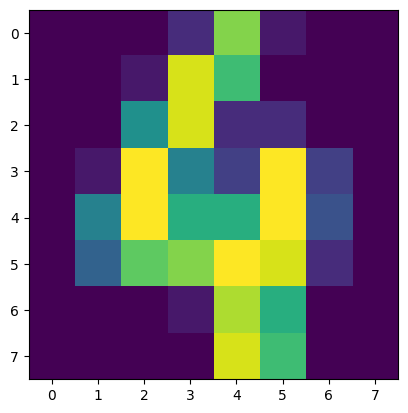

In [7]:
sample_i = 100

image = X_train.iloc[sample_i,:].to_numpy()
target = y_train

image = image.reshape(8,8)

_, axe = plt.subplots()

axe.imshow(image)
print(target[sample_i])

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3823, 64) (3823,)
(1797, 64) (1797,)


In [10]:
m = keras.Sequential([
  keras.layers.Dense(32, input_shape=[64,], activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(10)  
])

m.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


h = m.fit(X_train, y_train, epochs=10)

Epoch 1/10
120/120 [==============================] - 0s 659us/step - loss: 2.3421 - accuracy: 0.3720
Epoch 2/10
120/120 [==============================] - 0s 754us/step - loss: 0.7097 - accuracy: 0.7803
Epoch 3/10
120/120 [==============================] - 0s 712us/step - loss: 0.3719 - accuracy: 0.8951
Epoch 4/10
120/120 [==============================] - 0s 729us/step - loss: 0.2421 - accuracy: 0.9296
Epoch 5/10
120/120 [==============================] - 0s 771us/step - loss: 0.1728 - accuracy: 0.9524
Epoch 6/10
120/120 [==============================] - 0s 746us/step - loss: 0.1364 - accuracy: 0.9610
Epoch 7/10
120/120 [==============================] - 0s 729us/step - loss: 0.1132 - accuracy: 0.9694
Epoch 8/10
120/120 [==============================] - 0s 746us/step - loss: 0.1001 - accuracy: 0.9728
Epoch 9/10
120/120 [==============================] - 0s 721us/step - loss: 0.0853 - accuracy: 0.9741
Epoch 10/10
120/120 [==============================] - 0s 738us/step - loss: 0.075

In [11]:
train_data = pd.read_csv('optdigits.tra', encoding='cp949', header=None)

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3823, 64) (3823,)
(1797, 64) (1797,)


In [24]:
m = keras.Sequential([
  keras.layers.Dense(64, input_shape=(64,), activation="relu"),
  keras.layers.Dense(32, activation="relu"),
  keras.layers.Dense(10)
])

m.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          optimizer = keras.optimizers.Adam(learning_rate=0.001),
          metrics=['accuracy']
)

h = m.fit(X_train, y_train, epochs=10)
m.evaluate(X_test, y_test)

Epoch 1/10
120/120 [==============================] - 0s 796us/step - loss: 2.1268 - accuracy: 0.5341
Epoch 2/10
120/120 [==============================] - 0s 754us/step - loss: 0.3315 - accuracy: 0.9048
Epoch 3/10
120/120 [==============================] - 0s 746us/step - loss: 0.1854 - accuracy: 0.9464
Epoch 4/10
120/120 [==============================] - 0s 805us/step - loss: 0.1301 - accuracy: 0.9618
Epoch 5/10
120/120 [==============================] - 0s 788us/step - loss: 0.1066 - accuracy: 0.9678
Epoch 6/10
120/120 [==============================] - 0s 738us/step - loss: 0.0871 - accuracy: 0.9736
Epoch 7/10
120/120 [==============================] - 0s 779us/step - loss: 0.0707 - accuracy: 0.9799
Epoch 8/10
120/120 [==============================] - 0s 704us/step - loss: 0.0629 - accuracy: 0.9793
Epoch 9/10
120/120 [==============================] - 0s 687us/step - loss: 0.0573 - accuracy: 0.9830
Epoch 10/10
57/57 [==============================] - 0s 588us/step - loss: 0.1533 

[0.15331345796585083, 0.9532554149627686]

In [26]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(solver='liblinear')
m.fit(X_train, y_train)
print(m.score(X_train, y_train))
print(m.score(X_test, y_test))

0.9869212660214491
0.9471341124095715


In [28]:
# PCA
from sklearn.decomposition import PCA

p = PCA(n_components=8)
p = p.fit(X_train)
p_result =  p.transform(X_train)

print(X_train.shape)
print(p_result.shape)

(3823, 64)
(3823, 8)


In [31]:
m = LogisticRegression(solver='liblinear')
m.fit(p_result, y_train)
print(m.score(p_result, y_train))

p_result_test = p.transform(X_test)
print(m.score(p_result_test, y_test))

# print(m.score(X_test, y_test))  : p_result는 차원축소된 값으로 차원이 맞지 않아 오류 발생!

0.9152498038189903
0.8759042849193099
